#Curse of Dimensionality

In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
from numpy import clip, full, fill_diagonal
from numpy.random import uniform, multivariate_normal, seed
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
seed(42)
sns.set_style('white')

In [21]:
def get_distance_metrics(points):
    """Calculate mean of pairwise distances and
        mean of min pairwise distances"""
    pairwise_dist = squareform(pdist(points))
    fill_diagonal(pairwise_dist, np.nanmean(pairwise_dist, axis=1))
    avg_distance = np.mean(np.nanmean(pairwise_dist, axis=1))
    fill_diagonal(pairwise_dist, np.nanmax(pairwise_dist, axis=1))
    avg_min_distance = np.mean(np.nanmin(pairwise_dist, axis=1))
    return avg_distance, avg_min_distance

In [22]:
def simulate_distances(m, n, mean, var, corr):
    """Draw m random vectors of dimension n
        from uniform and normal distributions
        and return pairwise distance metrics"""
    uni_dist = get_distance_metrics(uniform(size=(m, n)))
    cov = full(shape=(n, n), fill_value=var * corr)
    fill_diagonal(cov, var)
    normal_points = multivariate_normal(
        full(shape=(n,), fill_value=mean), cov, m)
    normal_points = clip(normal_points, a_min=0, a_max=1)
    norm_dist = get_distance_metrics(normal_points)
    return uni_dist, norm_dist

In [23]:
n_points = 1000
min_dim, max_dim, step = 1, 2502, 100 # from 1 - 2501
dimensions = range(min_dim, max_dim, step)

In [24]:
mean = 0.5
var = (mean/3)**2 # 99% of sample in [0, 1]
corr = 0.25

In [25]:
col_names = ['Avg. Uniform',
             'Min. Uniform',
             'Avg. Normal',
             'Min. Normal']

In [26]:
avg_dist = []
for dim in dimensions:
    uni_dist, norm_dist = simulate_distances(n_points,
                                             dim,
                                             mean,
                                             var,
                                             corr)
    avg_dist.append([*uni_dist,
                     *norm_dist])

distances = pd.DataFrame(data=avg_dist,
                         columns=col_names,
                         index=dimensions)

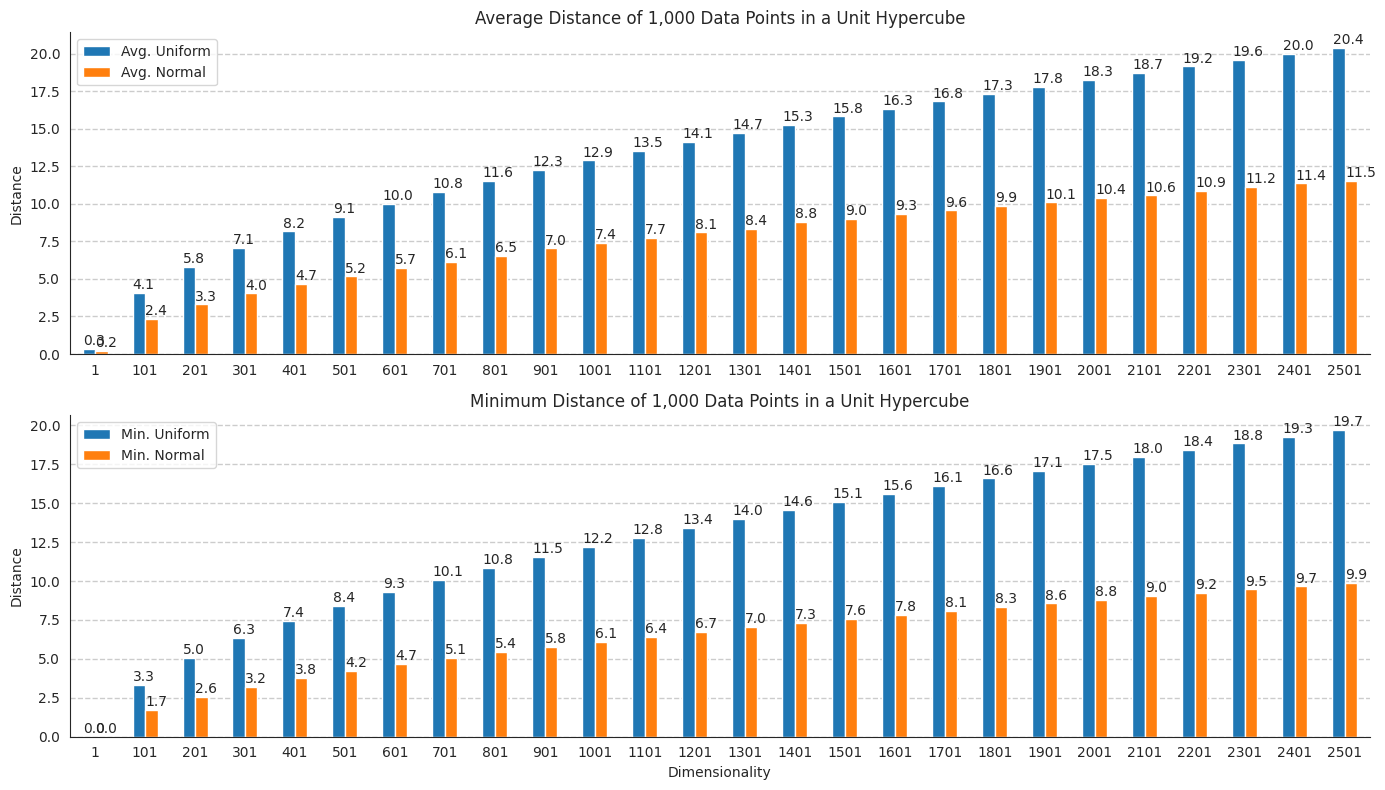

In [27]:
title = 'Distance of {:,.0f} Data Points in a Unit Hypercube'.format(n_points)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
distances[[ 'Avg. Uniform', 'Avg. Normal']].plot.bar(title='Average ' + title, ax=axes[0], rot=0)
distances[[ 'Min. Uniform', 'Min. Normal']].plot.bar(title='Minimum ' + title, ax=axes[1], rot=0)

for ax in axes:
    ax.grid(axis='y', lw=1, ls='--')
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + .005, p.get_height() + .25), fontsize=10)
    ax.set_ylabel('Distance')

axes[1].set_xlabel('Dimensionality')
sns.despine()
fig.tight_layout();

#PCA

In [30]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import pandas as pd
import numpy as np
from numpy.linalg import lstsq
from numpy.random import randn, seed
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from sklearn.decomposition import PCA

In [31]:
sns.set_style('white')
seed(42)

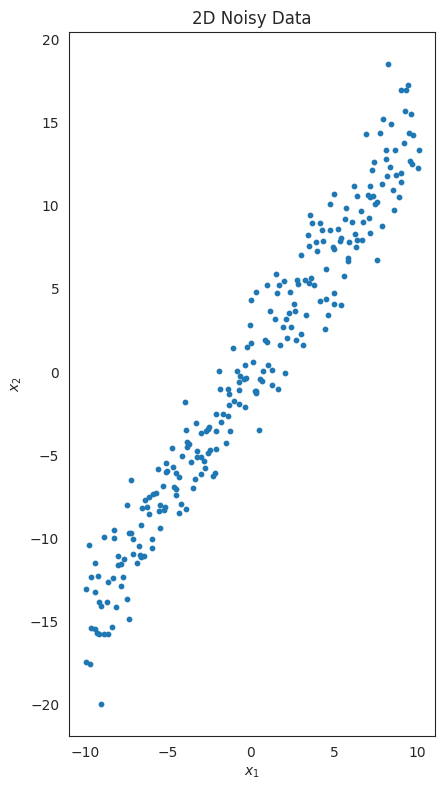

In [32]:
n_signals = 250
x1 = np.linspace(-10, 10, n_signals) + .1 * randn(n_signals)
x2 = 1.5 * x1 + 2 * randn(n_signals)
data = pd.DataFrame({'$x_1$': x1, '$x_2$': x2})
ax = data.plot.scatter(x=0, y=1, s=10, title='2D Noisy Data', figsize=(7,8))
ax.set_aspect('equal')
plt.tight_layout()

In [33]:
pca = PCA()
pca.fit(data)
pca.components_

array([[-0.54381787, -0.83920327],
       [ 0.83920327, -0.54381787]])

In [34]:
mean = pca.mean_
mean

array([-0.00024229,  0.03183435])